In [1]:
#Importing libraries 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
filename_data = os.path.join(os.getcwd(),"all_data.csv")
filename_orders = os.path.join(os.getcwd(),"all_orders.csv")

all_data = pd.read_csv(filename_data)
all_orders = pd.read_csv(filename_orders)

### What are the top selling products?

In [3]:
cancelled_orders = all_orders[all_orders['status_item'] == 'Cancelled'].copy()
returned_orders = all_orders[all_orders['status_item'] == 'Returned'].copy()
complete_orders = all_orders[all_orders['status_item'].isin(['Complete', 'Shipped'])].copy()
complete_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97626 entries, 1 to 177353
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_orderproducts         97626 non-null  int64  
 1   order_id_all             97626 non-null  int64  
 2   user_id_all              97626 non-null  int64  
 3   product_id_all           97626 non-null  int64  
 4   inventory_item_id_all    97626 non-null  int64  
 5   status_item              97626 non-null  object 
 6   created_at_item          97626 non-null  object 
 7   shipped_at_item          97626 non-null  object 
 8   delivered_at_item        44502 non-null  object 
 9   returned_at_item         0 non-null      object 
 10  sale_price_all           97626 non-null  float64
 11  status_order             97626 non-null  object 
 12  gender                   97626 non-null  object 
 13  created_at_order         97626 non-null  object 
 14  returned_at_order        0

In [4]:
top_selling_products = complete_orders.groupby(['product_id_all', 'name'])['num_of_item'].sum().reset_index().sort_values('num_of_item', ascending=False)
top_selling_products.head(10)

,product_id_all,name,num_of_item
17973,18795,Life is Good Men's King Of The Grill Short Sle...,30
16252,17045,Bayside Apparel Adult USA-Made Long-Sleeve Poc...,29
7933,8344,Port AuthorityÂ® - Ladies CRBNÂ® Trench,29
23575,24560,Wigwam Men's King Cotton Crew Length Crew Sock,27
23716,24705,San Francisco 49ers NFL Mens Sherpa Slide Slip...,27
7523,7911,Allegra K Ladies Long Sleeve Double Breasted S...,26
26932,28012,Free Country Men's Island Palm Plaid Free C Bo...,26
8203,8624,United Face Womens New Leather Moto Jacket,26
24036,25030,Kentwool Men's Tour Standard Sock,26
26007,27059,ESPN Men's Microfleece Lounge Pants,26


### Summarizing US Events Data

In [13]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filename = os.path.join(parent_dir, 'data', 'us_events.csv')
us_events = pd.read_csv(filename)
us_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2244720,NaN,3,9cadf286-9b30-459e-9a57-14fc2dac8cc9,2022-06-19 12:07:00+00:00,3.149.42.105,New York,New York,10023,Chrome,Adwords,/cancel,cancel
1,1347063,NaN,3,84ae95f4-d7cd-4bde-a003-21d305b2e824,2023-10-11 01:41:00+00:00,68.124.172.198,New York,New York,10306,Firefox,Email,/cancel,cancel
2,1670844,NaN,3,94c3d822-49e6-4fb7-8ed7-713667f99d68,2021-03-18 19:20:00+00:00,177.217.215.96,New York,New York,10457,Chrome,YouTube,/cancel,cancel
3,2007823,NaN,3,4c248995-3e0b-41b5-a81a-2705279aeab9,2023-09-26 08:45:00+00:00,37.255.80.241,New York,New York,10457,Firefox,Adwords,/cancel,cancel
4,1517051,NaN,3,36b7879c-523f-4ec8-9a90-d1ac9fae1166,2022-04-19 08:36:00+00:00,76.11.158.90,New York,New York,10469,Other,Adwords,/cancel,cancel


In [15]:
us_events['event_type'].unique()

array(['cancel', 'cart', 'department', 'home', 'product', 'purchase'],
      dtype=object)

In [24]:
perecentage_values = us_events['event_type'].value_counts(normalize=True)*100
print(perecentage_values)

event_type
product       34.829499
cart          24.451485
department    24.416980
purchase       7.475234
cancel         5.190022
home           3.636780
Name: proportion, dtype: float64


Maybe `cancel` and `home` are less important - could be dropped.

In [16]:
us_events['traffic_source'].unique()

array(['Adwords', 'Email', 'YouTube', 'Facebook', 'Organic'], dtype=object)

In [17]:
us_events['browser'].unique()

array(['Chrome', 'Firefox', 'Other', 'Safari', 'IE'], dtype=object)

In [20]:
us_events['sequence_number'].nunique()

13

* ` sequence_number` seems to be computing the seqence of events for each userID/Session_ID
* Notice that some of the user_id in events are NaN - guest browsing

In [23]:
print(us_events['user_id'].isnull().mean()*100)

46.600044652494724


46.6% of user_ID in events are NULL so we can drop these assuming these are user browsing data

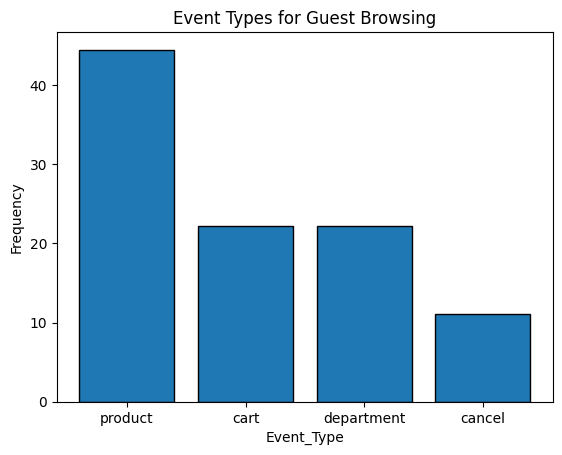

In [44]:
guest_users = us_events[us_events['user_id'].isnull()]
percentage_values = guest_users['event_type'].value_counts(normalize=True)*100
plt.bar(percentage_values.index, percentage_values.values, edgecolor='black')
plt.xlabel('Event_Type')
plt.ylabel('Frequency')
plt.title('Event Types for Guest Browsing')
plt.savefig('guest_events.png')

In [37]:
logged_in = us_events[us_events['user_id'].notnull()]
logged_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289408 entries, 290 to 541962
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               289408 non-null  int64  
 1   user_id          289408 non-null  float64
 2   sequence_number  289408 non-null  int64  
 3   session_id       289408 non-null  object 
 4   created_at       289408 non-null  object 
 5   ip_address       289408 non-null  object 
 6   city             287310 non-null  object 
 7   state            289408 non-null  object 
 8   postal_code      289408 non-null  int64  
 9   browser          289408 non-null  object 
 10  traffic_source   289408 non-null  object 
 11  uri              289408 non-null  object 
 12  event_type       289408 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 30.9+ MB


### Users Dataset

In [33]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filename = os.path.join(parent_dir, 'data', 'users.csv')
users = pd.read_csv(filename)
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [34]:
min_age = min(users['age'])
max_age = max(users['age'])

print(min_age)
print(max_age)

12
70


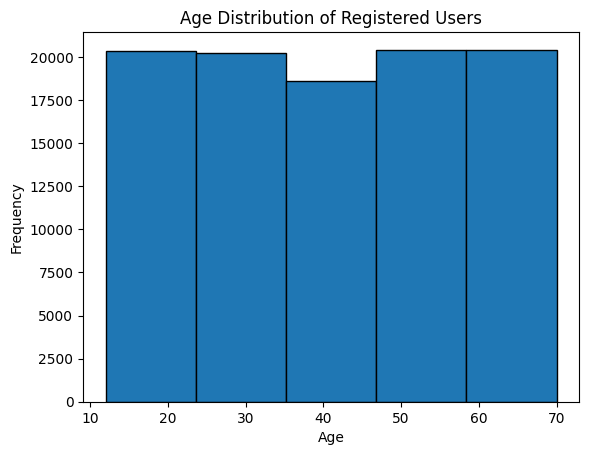

In [45]:
plt.hist(users['age'], bins=5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Registered Users')
plt.savefig('users_age_dist.png')

### Products